In [1]:
#06. Transfer Learning with TensorFlow : Scaling up (🍔👁 Food Vision mini)

**Goal is to beat the origibal food 101 papers's result with 10% data**

We're going to go through the follow with TensorFlow:

* Downloading and preparing 10% of the Food101 data (10% of training data)
* Training a feature extraction transfer learning model on 10% of the Food101 training data
* Fine-tuning our feature extraction model
* Saving and loaded our trained model
* Evaluating the performance of our Food Vision model trained on 10% of the training data
* Finding our model's most wrong predictions

In [2]:
# Are we using a GPU?
!nvidia-smi

Mon Nov 14 16:01:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/Hirann97/tensorflow_deeplearning/main/helper_function.py

--2022-11-14 16:01:01--  https://raw.githubusercontent.com/Hirann97/tensorflow_deeplearning/main/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10558 (10K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]  10.31K  --.-KB/s    in 0s      

2022-11-14 16:01:02 (88.6 MB/s) - ‘helper_function.py’ saved [10558/10558]



In [4]:
# Import series of helper functions for the notebook (we've created/used these in previous notebooks)
from helper_function import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [5]:
# Download data from Google Storage (already preformatted)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip 

unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2022-11-14 16:01:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  23.3MB/s    in 72s     

2022-11-14 16:02:17 (21.6 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [6]:
walk_through_dir('101_food_classes_10_percent')

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/cup_cakes'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/grilled_cheese_sandwich'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/club_sandwich'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/tacos'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/mussels'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/macaroni_and_cheese'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/churros'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/pad_thai'.
There are 0 directories and 75 images i

In [7]:
import tensorflow as tf
IMAGE_SIZE=(224,224)
train_data_all_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                              label_mode='categorical',
                                                                              image_size=IMAGE_SIZE)
test_data_all_10_persent=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                             label_mode='categorical',
                                                                             image_size=IMAGE_SIZE,
                                                                             shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [8]:
checkpoint_path="101_classes_10_percent_data_model_checkpoint"
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                       save_weights_only=True,
                                                       moniter='val_accuracy',
                                                       save_best_only=True)

In [9]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation=Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomRotation(0.2)
],name='data_augmentation')

In [10]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=layers.Input(shape=(224,224,3),name='input_layer')
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=layers.GlobalAveragePooling2D(name='global_average_pooling')(x)
outputs=layers.Dense(len(train_data_all_10_percent.class_names),activation='softmax',name='output_layer')(x)
model_1=tf.keras.Model(inputs,outputs)

16705208/16705208 [==============================] - 2s 0us/step


In [11]:
# Get a summary of our model
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [12]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_all_classes_10_percent=model_1.fit(train_data_all_10_percent,
            epochs=5,
            validation_data=test_data_all_10_persent,
            validation_steps=int(0.15* len(test_data_all_10_persent)),
            callbacks=[checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 98s 353ms/step - loss: 3.3650 - accuracy: 0.2729 - val_loss: 2.5513 - val_accuracy: 0.4251
Epoch 2/5
237/237 [==============================] - 65s 271ms/step - loss: 2.2101 - accuracy: 0.4919 - val_loss: 2.1465 - val_accuracy: 0.4785
Epoch 3/5
237/237 [==============================] - 61s 257ms/step - loss: 1.8398 - accuracy: 0.5568 - val_loss: 1.9593 - val_accuracy: 0.5061
Epoch 4/5
237/237 [==============================] - 55s 229ms/step - loss: 1.6215 - accuracy: 0.6033 - val_loss: 1.8394 - val_accuracy: 0.5339
Epoch 5/5
237/237 [==============================] - 53s 224ms/step - loss: 1.4848 - accuracy: 0.6313 - val_loss: 1.7745 - val_accuracy: 0.5461


In [13]:
# Evaluate model 
results_feature_extraction_model = model_1.evaluate(test_data_all_10_persent)
results_feature_extraction_model

790/790 [==============================] - 59s 75ms/step - loss: 1.5791 - accuracy: 0.5834


[1.5791282653808594, 0.583366334438324]

**Here we had just beat the results from the original food 101 paper**

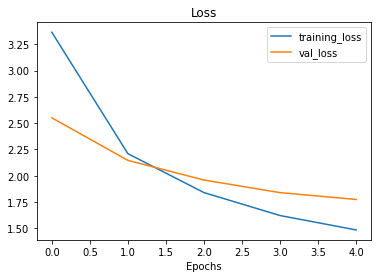

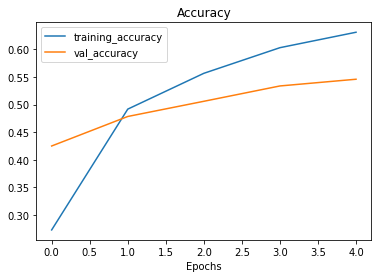

In [14]:
plot_loss_curves(history_all_classes_10_percent)

# **fine tuning**

To fine-tune the base model we'll first set its trainable attribute to True, unfreezing all of the frozen.

Then since we've got a relatively small training dataset, we'll refreeze every layer except for the last 5, making them trainable.

In [15]:
base_model.trainable=True

for layer in base_model.layers[:-5]:
  layer.trainable=False

In [16]:
# Recompile model with lower learning rate
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0001), # 10x lower learning rate than default
              metrics=['accuracy'])

In [17]:
for layer in model_1.layers:
  print(layer.name,layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_average_pooling True
output_layer True


In [18]:
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name,layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 tf.math.truediv False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [19]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10 # model has already done 5 epochs, this is the total number of epochs we're after (5+5=10)

history_all_classes_10_percent_fine_tune = model_1.fit(train_data_all_10_percent,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data_all_10_persent,
                                                     validation_steps=int(0.15 * len(test_data_all_10_persent)), # validate on 15% of the test data
                                                     initial_epoch=history_all_classes_10_percent.epoch[-1]) # start from previous last epoch

Epoch 5/10
237/237 [==============================] - 63s 231ms/step - loss: 1.2585 - accuracy: 0.6719 - val_loss: 1.7655 - val_accuracy: 0.5347
Epoch 6/10
237/237 [==============================] - 48s 199ms/step - loss: 1.1232 - accuracy: 0.7039 - val_loss: 1.7232 - val_accuracy: 0.5437
Epoch 7/10
237/237 [==============================] - 47s 196ms/step - loss: 1.0471 - accuracy: 0.7170 - val_loss: 1.7025 - val_accuracy: 0.5498
Epoch 8/10
237/237 [==============================] - 48s 198ms/step - loss: 0.9821 - accuracy: 0.7287 - val_loss: 1.6949 - val_accuracy: 0.5532
Epoch 9/10
237/237 [==============================] - 46s 192ms/step - loss: 0.9166 - accuracy: 0.7534 - val_loss: 1.7264 - val_accuracy: 0.5474
Epoch 10/10
237/237 [==============================] - 45s 186ms/step - loss: 0.8818 - accuracy: 0.7657 - val_loss: 1.7016 - val_accuracy: 0.5556


In [20]:
# Evaluate fine-tuned model on the whole test dataset
results_all_classes_10_percent_fine_tune = model_1.evaluate(test_data_all_10_persent)
results_all_classes_10_percent_fine_tune

790/790 [==============================] - 59s 75ms/step - loss: 1.4762 - accuracy: 0.6089


[1.4761914014816284, 0.6089109182357788]

We might get a better picture by using our compare_historys() function and seeing what the training curves say.

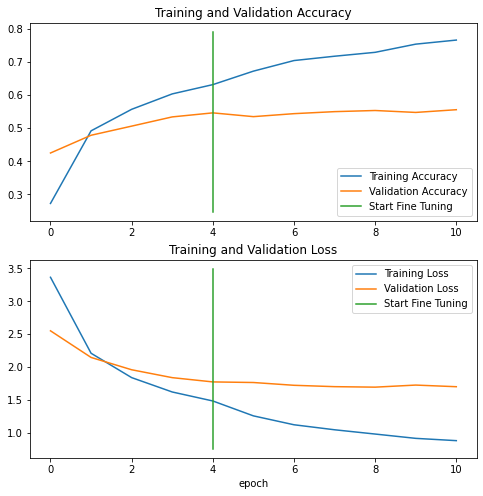

In [21]:
compare_historys(original_history=history_all_classes_10_percent,
                 new_history=history_all_classes_10_percent_fine_tune,
                 initial_epochs=5)

In [22]:
model_1.save('/content/drive/MyDrive/tensorflow_models/101_food_class_10_percent_saved_big_dog_mode')

In [23]:
loaded_model=tf.keras.models.load_model('/content/drive/MyDrive/tensorflow_models/101_food_class_10_percent_saved_big_dog_mode')

# Evaluating the performance across all diffrent class 

In [24]:
# evalaute the loaded model
loaded_models_results=loaded_model.evaluate(test_data_all_10_persent)
loaded_models_results

790/790 [==============================] - 62s 77ms/step - loss: 1.4762 - accuracy: 0.6089


[1.4761914014816284, 0.6089109182357788]

In [25]:
import tensorflow as tf

# Download pre-trained model from Google Storage (like a cooking show, I trained this model earlier, so the results may be different than above)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
saved_model_path = "06_101_food_class_10_percent_saved_big_dog_model.zip"
unzip_data(saved_model_path)

--2022-11-14 16:20:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip’

06_101_food_class_1 100%[===================>]  44.59M  15.5MB/s    in 2.9s    

2022-11-14 16:20:26 (15.5 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip’ saved [46760742/46760742]



In [26]:
model = tf.keras.models.load_model(saved_model_path.split(".")[0]) # don't include ".zip" in loaded model path

In [27]:
# Check to see if loaded model is a trained model
loaded_loss, loaded_accuracy = model.evaluate(test_data_all_10_persent)
loaded_loss, loaded_accuracy

790/790 [==============================] - 62s 76ms/step - loss: 1.8027 - accuracy: 0.6078


(1.8027206659317017, 0.6077623963356018)

In [28]:
# Make predictions with model
pred_probs = model_1.predict(test_data_all_10_persent, verbose=1) # set verbosity to see how long it will take 

790/790 [==============================] - 64s 79ms/step


In [29]:
len(pred_probs)

25250

In [30]:
pred_probs.shape

(25250, 101)

In [31]:
pred_probs[:10]

array([[3.6017904e-01, 1.4498929e-04, 1.3237225e-01, ..., 4.8335201e-06,
        3.0078474e-03, 2.7452856e-02],
       [9.0688831e-01, 9.8106065e-09, 3.3452763e-04, ..., 1.3673324e-03,
        2.0930720e-07, 4.6504797e-06],
       [5.4348606e-01, 1.0780241e-02, 2.5902577e-02, ..., 2.2776470e-04,
        2.9726265e-04, 6.8206326e-03],
       ...,
       [1.0798237e-01, 3.6085999e-06, 4.4913515e-03, ..., 6.4345427e-02,
        5.2015105e-04, 1.2307947e-04],
       [1.3867773e-01, 1.3104650e-04, 1.7922291e-01, ..., 2.3202985e-04,
        2.3813859e-04, 5.1667087e-04],
       [7.4597108e-01, 3.3255819e-07, 1.6259036e-03, ..., 5.0418107e-03,
        6.7631208e-07, 1.1513386e-03]], dtype=float32)

In [32]:
# We get one prediction probability per class
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f'the class with highest prediction probability by the model for sample 0 is: {pred_probs[0].argmax()}')

Number of prediction probabilities for sample 0: 101
What prediction probability sample 0 looks like:
 [3.6017904e-01 1.4498929e-04 1.3237225e-01 4.8401051e-07 9.1349511e-06
 9.3119456e-07 1.9796060e-04 7.6505847e-07 3.0279988e-02 3.1225747e-04
 2.5906288e-06 1.2907666e-05 7.7343220e-04 1.4310626e-07 2.7659347e-03
 1.9382305e-03 9.0566991e-06 6.9659541e-04 6.6162832e-03 1.3576630e-05
 5.0975289e-04 9.5970772e-06 2.1389402e-04 2.7786422e-04 1.4300804e-03
 1.6502483e-03 7.5890688e-04 1.5583611e-05 1.4501302e-01 1.9423272e-03
 5.2436153e-06 3.6231915e-03 1.4593177e-04 4.7496221e-07 8.0389306e-03
 7.9211886e-06 1.2977362e-04 9.4443519e-04 2.2552436e-02 2.2369781e-05
 1.0917904e-03 2.8482343e-03 3.7293960e-04 4.2336054e-05 2.1046324e-04
 1.6239897e-05 2.7640609e-04 1.4396240e-04 2.0983034e-06 4.4726618e-02
 5.2153060e-05 2.8001712e-04 6.6409066e-02 1.2237984e-02 3.1602369e-05
 6.6292058e-03 1.2715585e-02 8.4901496e-04 6.8200212e-03 5.1785260e-05
 6.7324692e-07 5.9357998e-03 1.3262939e-02 4.

In [59]:
pred_classes=pred_probs.argmax(axis=1)
pred_classes[:10]

array([ 0,  0,  0,  8,  8, 78, 29, 46,  9,  0])

In [34]:
y_labels=[]
for images,labels in test_data_all_10_persent.unbatch():
  y_labels.append(labels.numpy().argmax())
  

In [35]:
 y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [36]:
# How many labels are there? (should be the same as how many prediction probabilities we have)
len(y_labels)

25250

In [37]:
loaded_accuracy

0.6077623963356018

In [38]:
from sklearn.metrics import accuracy_score
sklearn_accuracy=accuracy_score(y_labels,pred_class)
sklearn_accuracy

0.6089108910891089

In [39]:
import numpy as np
print(f"Close? {np.isclose(loaded_accuracy, sklearn_accuracy)} | Difference: {loaded_accuracy - sklearn_accuracy}")

Close? False | Difference: -0.00114849475350709


In [40]:
from helper_function import make_confusion_matrix

In [41]:
class_names=test_data_all_10_persent.class_names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

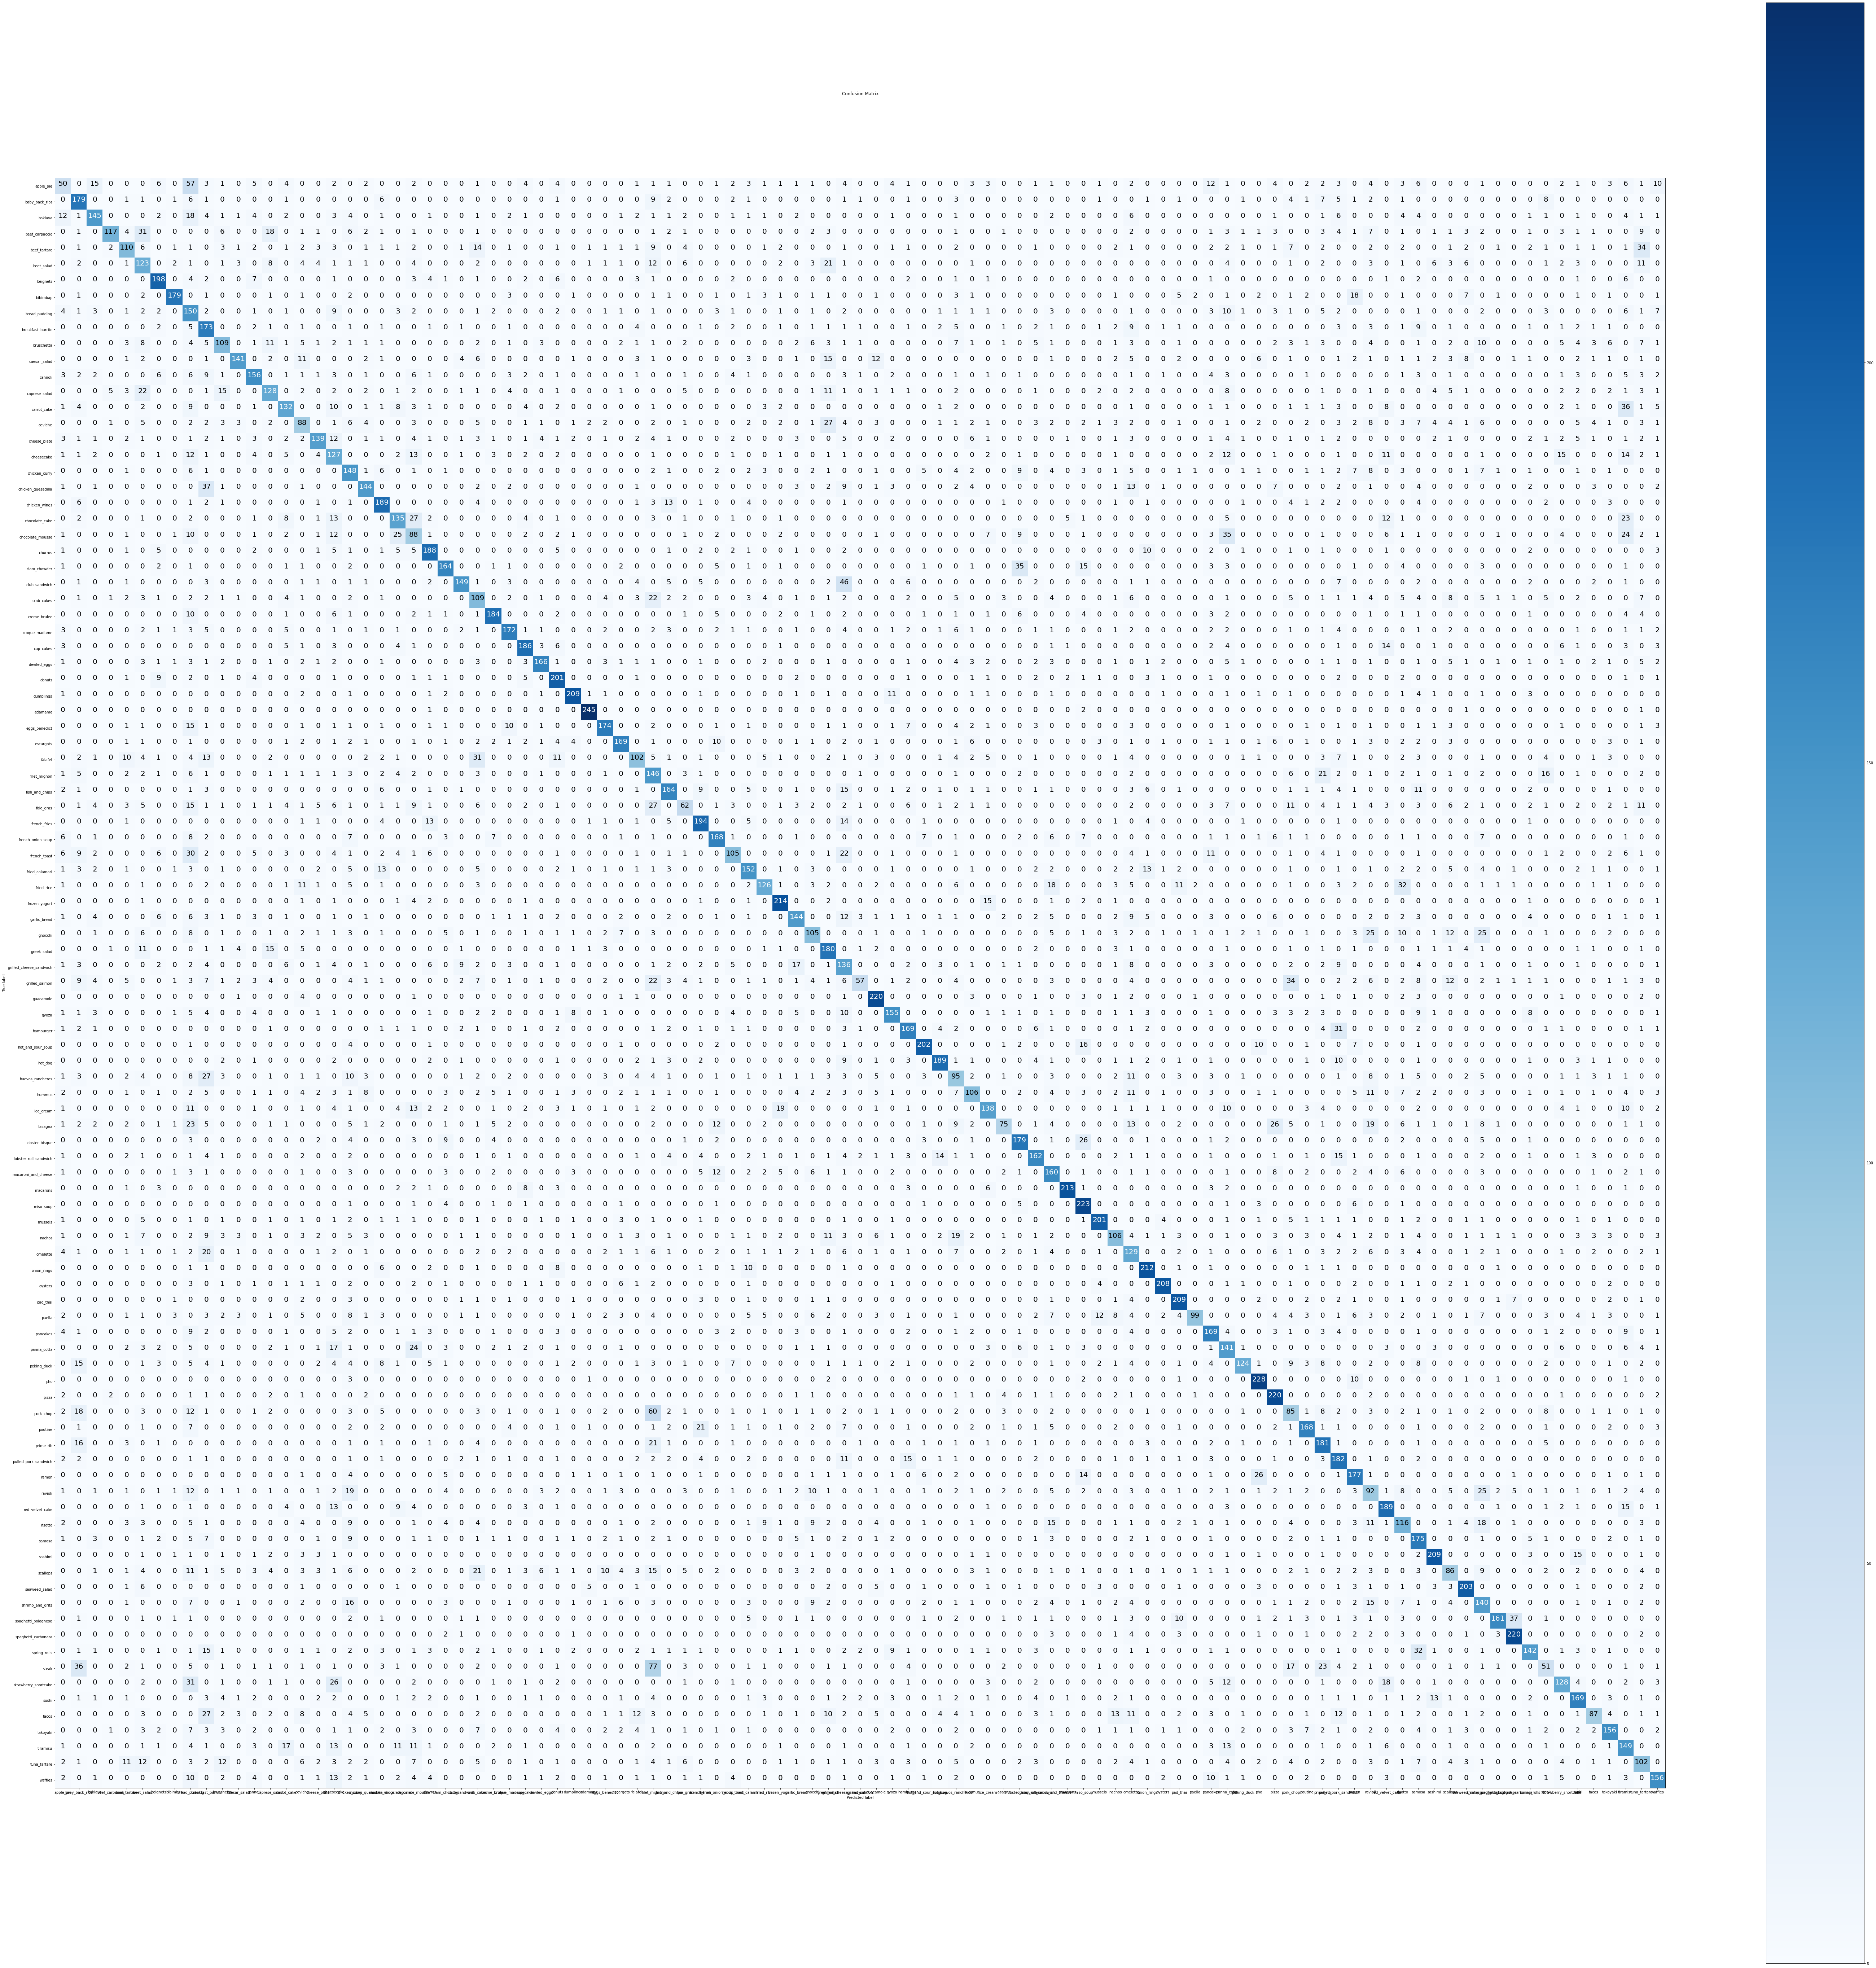

In [61]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100,100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_labels,pred_classes))

              precision    recall  f1-score   support

           0       0.35      0.20      0.26       250
           1       0.53      0.72      0.61       250
           2       0.72      0.58      0.64       250
           3       0.90      0.47      0.62       250
           4       0.57      0.44      0.50       250
           5       0.39      0.49      0.44       250
           6       0.73      0.79      0.76       250
           7       0.90      0.72      0.80       250
           8       0.24      0.60      0.34       250
           9       0.39      0.69      0.50       250
          10       0.55      0.44      0.48       250
          11       0.83      0.56      0.67       250
          12       0.68      0.62      0.65       250
          13       0.58      0.51      0.54       250
          14       0.60      0.53      0.56       250
          15       0.42      0.35      0.38       250
          16       0.70      0.56      0.62       250
          17       0.36    

In [63]:
classification_report_dict=classification_report(y_labels,pred_classes,output_dict=True)
classification_report_dict

{'0': {'precision': 0.3546099290780142,
  'recall': 0.2,
  'f1-score': 0.2557544757033248,
  'support': 250},
 '1': {'precision': 0.528023598820059,
  'recall': 0.716,
  'f1-score': 0.6078098471986418,
  'support': 250},
 '2': {'precision': 0.7178217821782178,
  'recall': 0.58,
  'f1-score': 0.6415929203539824,
  'support': 250},
 '3': {'precision': 0.9,
  'recall': 0.468,
  'f1-score': 0.6157894736842106,
  'support': 250},
 '4': {'precision': 0.5670103092783505,
  'recall': 0.44,
  'f1-score': 0.49549549549549554,
  'support': 250},
 '5': {'precision': 0.3942307692307692,
  'recall': 0.492,
  'f1-score': 0.43772241992882566,
  'support': 250},
 '6': {'precision': 0.7333333333333333,
  'recall': 0.792,
  'f1-score': 0.7615384615384616,
  'support': 250},
 '7': {'precision': 0.8994974874371859,
  'recall': 0.716,
  'f1-score': 0.7973273942093542,
  'support': 250},
 '8': {'precision': 0.23885350318471338,
  'recall': 0.6,
  'f1-score': 0.34168564920273353,
  'support': 250},
 '9': {'pr

In [64]:
class_f1_score={}
for i,k in classification_report_dict.items():
  if i=='accuracy':
    break
  else:
    class_f1_score[class_names[int(i)]]=k['f1-score']


class_f1_score

{'apple_pie': 0.2557544757033248,
 'baby_back_ribs': 0.6078098471986418,
 'baklava': 0.6415929203539824,
 'beef_carpaccio': 0.6157894736842106,
 'beef_tartare': 0.49549549549549554,
 'beet_salad': 0.43772241992882566,
 'beignets': 0.7615384615384616,
 'bibimbap': 0.7973273942093542,
 'bread_pudding': 0.34168564920273353,
 'breakfast_burrito': 0.49712643678160917,
 'bruschetta': 0.48444444444444446,
 'caesar_salad': 0.6714285714285714,
 'cannoli': 0.6486486486486487,
 'caprese_salad': 0.5446808510638298,
 'carrot_cake': 0.5628997867803838,
 'ceviche': 0.38344226579520696,
 'cheese_plate': 0.6205357142857143,
 'cheesecake': 0.4205298013245033,
 'chicken_curry': 0.49006622516556286,
 'chicken_quesadilla': 0.6428571428571429,
 'chicken_wings': 0.7065420560747664,
 'chocolate_cake': 0.5613305613305614,
 'chocolate_mousse': 0.3358778625954199,
 'churros': 0.7300970873786407,
 'clam_chowder': 0.6905263157894738,
 'club_sandwich': 0.6866359447004609,
 'crab_cakes': 0.40445269016697594,
 'creme

In [65]:
import pandas as pd
f1_scores=pd.DataFrame({'class_names':list(class_f1_score.keys()),
                        'f1_score':list(class_f1_score.values())}).sort_values('f1_score',ascending=False)

In [66]:
f1_scores.head(10)

,class_names,f1_score
33,edamame,0.960784
63,macarons,0.900634
69,oysters,0.864865
32,dumplings,0.836000
91,spaghetti_carbonara,0.834915
75,pho,0.832117
65,mussels,0.828866
54,hot_and_sour_soup,0.824490
86,sashimi,0.821218
45,frozen_yogurt,0.818356


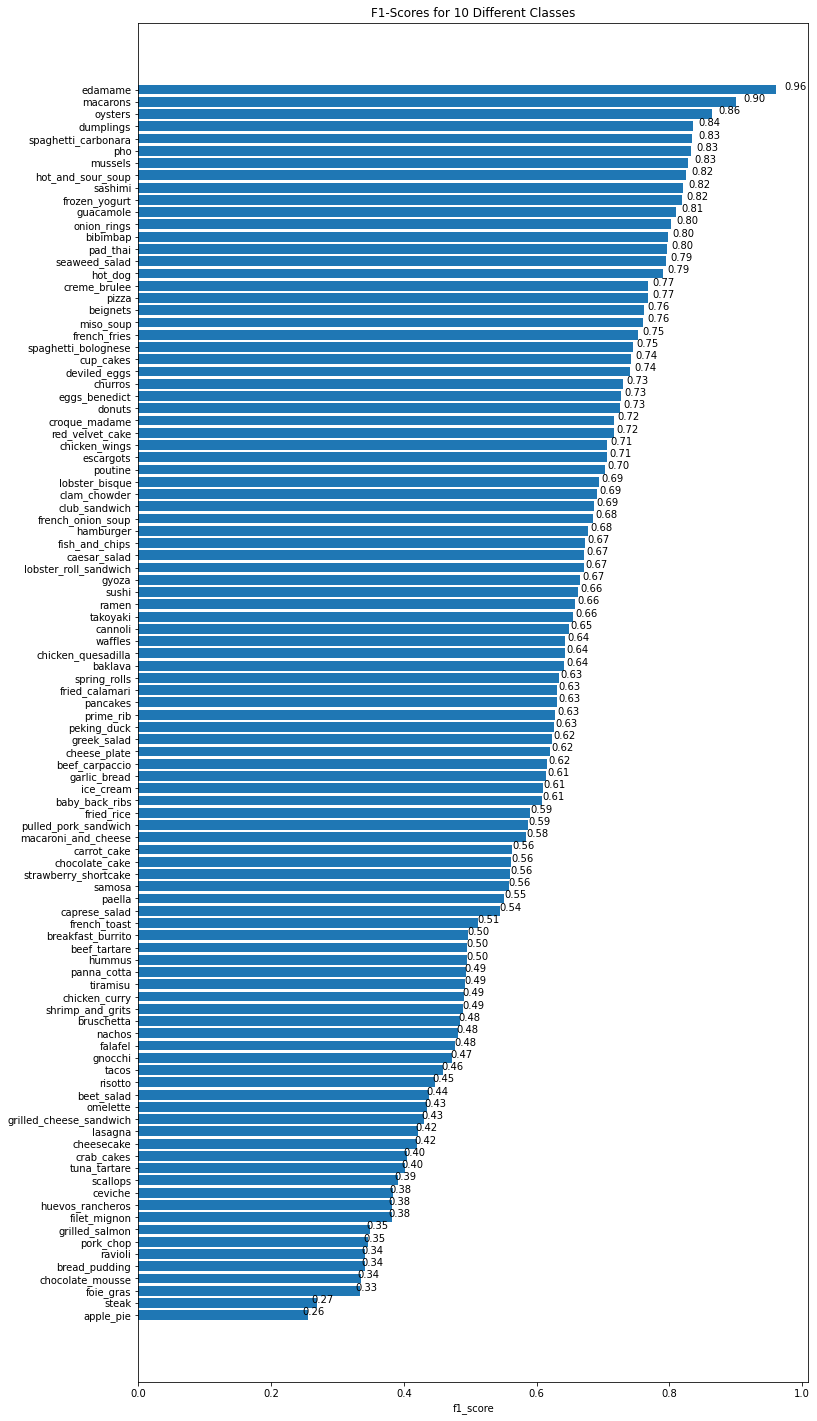

In [67]:
import matplotlib.pyplot as plt
ig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1_score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_names"]))
ax.set_xlabel("f1_score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

In [49]:
# visualising the predictions on the test image

In [68]:
def load_and_prep_image(filename,img_shape=224,scale=True):
  img=tf.io.read_file(filename)
  img=tf.io.decode_image(img)
  img=tf.image.resize(img,[img_shape,img_shape])
  if scale:
    return img/255.
  else:
    return img

1/1 [==============================] - 0s 25ms/step


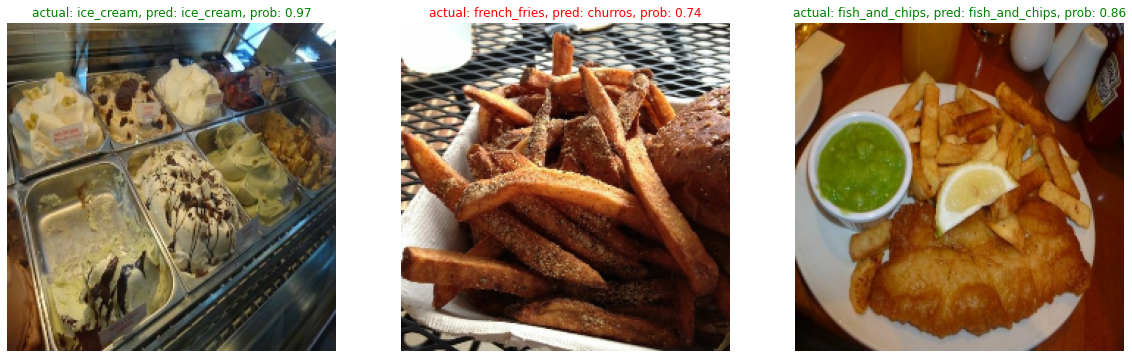

In [69]:
import os
import random
plt.figure(figsize=(20,12))
for i in range(3):
  class_name=random.choice(class_names)
  file_name=random.choice(os.listdir(test_dir+'/'+ class_name))
  file_path=test_dir+class_name+'/'+ file_name

  img=load_and_prep_image(file_path,scale=False)
  pred_prob=model_1.predict(tf.expand_dims(img,axis=0))
  pred_class=class_names[pred_prob.argmax()]

  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);


In [70]:
filepaths=[]
for filepath in test_data_all_10_persent.list_files('101_food_classes_10_percent/test/*/*.jpg',shuffle=False):
  filepaths.append(filepath.numpy())

filepaths[:10]


[b'101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1113017.jpg']

'beef_tartare'

In [74]:
import pandas as pd
pred_df=pd.DataFrame({'img_path':filepaths,
                      'y_true':y_labels,
                      'y_pred':pred_classes,
                      'pred_condf':pred_probs.max(axis=1),
                      'y_true_class_name': [class_names[i] for i in y_labels],
                      'y_pred_class_name': [class_names[i] for i in pred_classes]})

In [75]:

pred_df.head()

,img_path,y_true,y_pred,pred_condf,y_true_class_name,y_pred_class_name
0,b'101_food_classes_10_percent/test/apple_pie/1...,0,0,0.360179,apple_pie,apple_pie
1,b'101_food_classes_10_percent/test/apple_pie/1...,0,0,0.906888,apple_pie,apple_pie
2,b'101_food_classes_10_percent/test/apple_pie/1...,0,0,0.543486,apple_pie,apple_pie
3,b'101_food_classes_10_percent/test/apple_pie/1...,0,8,0.245763,apple_pie,bread_pudding
4,b'101_food_classes_10_percent/test/apple_pie/1...,0,8,0.609922,apple_pie,bread_pudding


In [76]:
pred_df['pred_correct']=pred_df['y_true']==pred_df['y_pred']
pred_df.head()

,img_path,y_true,y_pred,pred_condf,y_true_class_name,y_pred_class_name,pred_correct
0,b'101_food_classes_10_percent/test/apple_pie/1...,0,0,0.360179,apple_pie,apple_pie,True
1,b'101_food_classes_10_percent/test/apple_pie/1...,0,0,0.906888,apple_pie,apple_pie,True
2,b'101_food_classes_10_percent/test/apple_pie/1...,0,0,0.543486,apple_pie,apple_pie,True
3,b'101_food_classes_10_percent/test/apple_pie/1...,0,8,0.245763,apple_pie,bread_pudding,False
4,b'101_food_classes_10_percent/test/apple_pie/1...,0,8,0.609922,apple_pie,bread_pudding,False


In [77]:
top_100_wrong=pred_df[pred_df['pred_correct']==False].sort_values('pred_condf',ascending=False)[:100]
top_100_wrong.head(10)

,img_path,y_true,y_pred,pred_condf,y_true_class_name,y_pred_class_name,pred_correct
21810,b'101_food_classes_10_percent/test/scallops/17...,87,29,0.998647,scallops,cup_cakes,False
9110,b'101_food_classes_10_percent/test/falafel/241...,36,31,0.998305,falafel,donuts,False
191,b'101_food_classes_10_percent/test/apple_pie/3...,0,31,0.997900,apple_pie,donuts,False
18001,b'101_food_classes_10_percent/test/pancakes/10...,72,67,0.997530,pancakes,omelette,False
23797,b'101_food_classes_10_percent/test/sushi/16593...,95,86,0.997412,sushi,sashimi,False
11642,b'101_food_classes_10_percent/test/garlic_brea...,46,10,0.997357,garlic_bread,bruschetta,False
7194,b'101_food_classes_10_percent/test/croque_mada...,28,7,0.996672,croque_madame,bibimbap,False
10013,b'101_food_classes_10_percent/test/french_frie...,40,43,0.996332,french_fries,fried_calamari,False
722,b'101_food_classes_10_percent/test/baklava/640...,2,85,0.996037,baklava,samosa,False
10741,b'101_food_classes_10_percent/test/french_toas...,42,1,0.995301,french_toast,baby_back_ribs,False


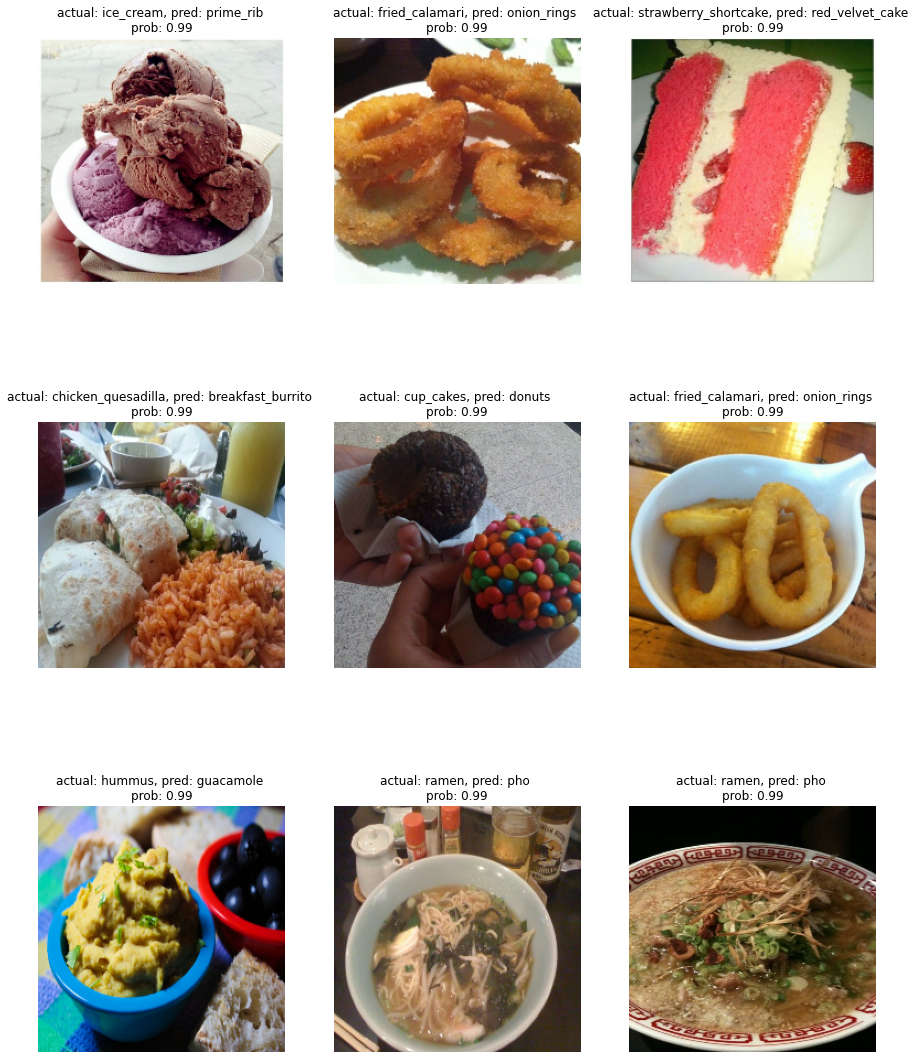

In [81]:
images_to_view=9
start_index=10
plt.figure(figsize=(15,20))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3,3,i+1)
  img=load_and_prep_image(row[1],scale=True)
  _,_,_,_,pred_prob,y_true,y_pred,_=row
  plt.imshow(img)

  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)